# Welcome to my Titanic - Machine Learning from Disaster notebook!

This notebook is part of my learning journey, where I aim to study how to handle a data science project from beginning to end with detailed steps. My focus is not only on writing code but also on understanding the decision-making process behind each step, including EDA, feature engineering, modeling, and evaluation.

I believe that learning is best done through feedback and discussions, so I would love to hear your thoughts! Whether it’s about my approach, alternative methods, or ways to improve my analysis, your comments are incredibly valuable to me.

My Goals for This Project
- Strengthen my ability to plan and structure a data science project effectively.
- Improve my EDA skills by learning what to look for, why it matters, and when to use specific techniques.
- Gain better intuition about modeling, feature selection, and handling different challenges in machine learning.
- Learn how to evaluate models properly beyond accuracy scores.

This notebook is structured to document my learning process rather than just providing a competition-winning solution. If you have any suggestions or feedback, feel free to drop a comment—let’s learn together!

Lets import the libraries and some settings.

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', False)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Please find utilized functions in the following:

Let's import the data sets:

In [4]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# 1 - EDA Section:

# 1.1 - General Understanding

Firstly, quickly look some informations

(df_train.info()
df_test.info()
df_train.shape
df_test.shape can also utilized for the information.)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


While exploring the dataset, two things caught my attention.
1. There is 0 Fare value
2. Seems like there is a Ticket call "LINE".
Let's quickly check them out.

In [7]:
df_train[df_train["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [8]:
df_train[df_train["Ticket"] == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


Let's check unique values:

In [9]:
for col in df_train.columns:
    print(col, df_train[col].nunique())

#I put the way I am doing firstly. The approach I used may not be the best. Comment will be put for better ways. Also, please feel free to suggest me! Thanks!

#df_train.nunique()

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


Lets check balance based on the Target Value (to investigate Class Imbalance)

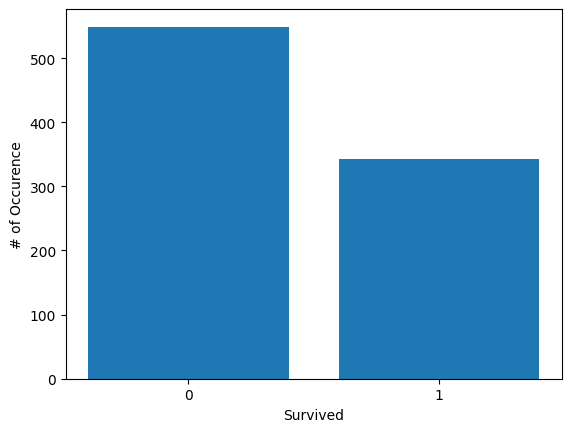

In [10]:
t = df_train["Survived"].value_counts().reset_index()

plt.bar(["0", "1"], list(t["count"]))
plt.xlabel("Survived")
plt.ylabel("# of Occurence")
plt.show()

For general data understanding, here a simple function:

In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Unique #####################")
    for col in dataframe.columns:
        print(col, df_train[col].nunique())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [12]:
check_df(df_train)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  fema

In [13]:
check_df(df_test)

##################### Shape #####################
(418, 11)
##################### Types #####################
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Pclass                                          Name     Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked
0          892       3                              Kelly, Mr. James    male  34.5      0      0   330911   7.8292   NaN        Q
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   363272   7.0000   NaN        S
2          894       2                     Myles, Mr. Thomas Francis    male  62.0      0      0   240276   9.6875   NaN        Q
3          895       3                              Wi

# 1.2 - Missing Value Analysis


Investigate missing values per column and visualize in heatmap

<Axes: >

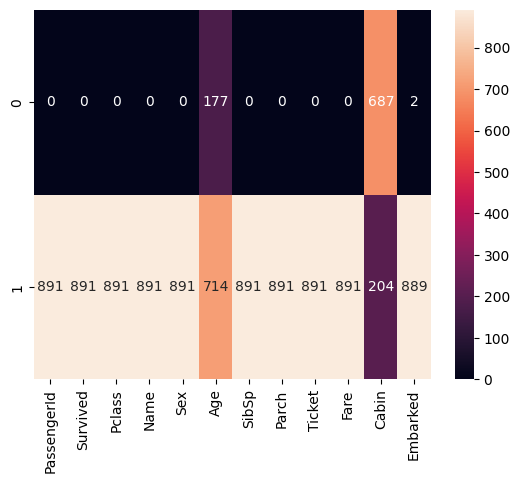

In [14]:
df_final = pd.DataFrame()
for col in df_train.columns:
    empty = df_train[col].isnull().sum()
    total = len(df_train[col])
    full = total - empty
    df = pd.DataFrame(data=(empty, full), index=(0, 1), columns=[col])
    df_final = pd.concat([df_final,df], axis= 1)

sns.heatmap(df_final, annot=True, fmt = 'd')

Investigation missingness in Age:

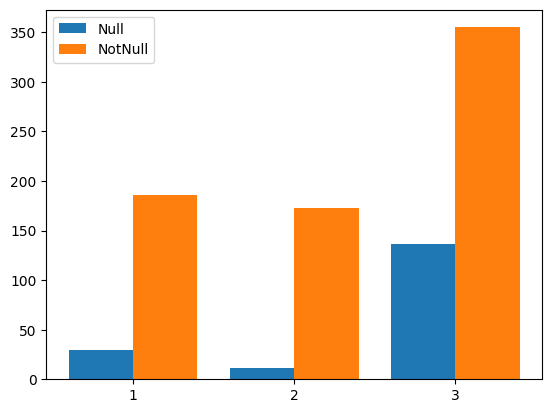

In [15]:
pclass_age = df_train.groupby("Pclass").agg({"Age":[lambda x: x.isnull().sum(),lambda x: x.notnull().sum()]})
pclass_age.columns = pclass_age.columns.droplevel(0)
pclass_age = pclass_age.reset_index()
pclass_age.columns = ["Plcass", "Null", "NotNull"]

x_axis = np.arange(len(pclass_age["Plcass"]))

plt.bar(x_axis - 0.2, pclass_age["Null"], 0.4, label = "Null")
plt.bar(x_axis + 0.2, pclass_age["NotNull"], 0.4, label = "NotNull")
plt.xticks(x_axis, pclass_age["Plcass"])
plt.legend()
plt.show()

While working on it, I want to check miss values for different columns too. Since we are going to repeat the process, lets create a function call missingness:

In [16]:
def missingness(dataframe, target, col, plot = False):
    helper1 = dataframe.groupby(col).agg({target:[lambda x: x.isnull().sum(), lambda x: x.notnull().sum()]})
    helper1.columns = helper1.columns.droplevel(0)
    helper1 = helper1.reset_index()
    helper1.columns = [col, "Null", "NotNull"]
    helper1["Ratio"] = (helper1["Null"] / (helper1["Null"]+helper1["NotNull"]))*100
    helper1["RatioOverall"] = (helper1["Null"] / len(dataframe[col])) * 100

    if plot:
        x_axis = np.arange(len(helper1[col]))
        plt.bar(x_axis - 0.2, helper1["Null"], 0.4, label = "Null")
        plt.bar(x_axis + 0.2, helper1["NotNull"], 0.4, label="NotNull")
        plt.xticks(x_axis, helper1[col])
        plt.legend()
        plt.show()
    return helper1

Lets examine some of them.

Please find all list I looked.

- Age, Sex
- Age, Survived
- Cabin, Pclass
- Cabin, Embarked
- Cabin, Survived

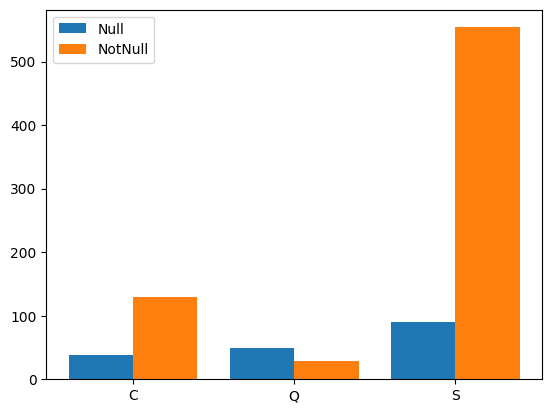

,Embarked,Null,NotNull,Ratio,RatioOverall
0,C,38,130,22.619048,4.264871
1,Q,49,28,63.636364,5.499439
2,S,90,554,13.975155,10.101010


In [17]:
missingness(df_train,"Age","Embarked", True)

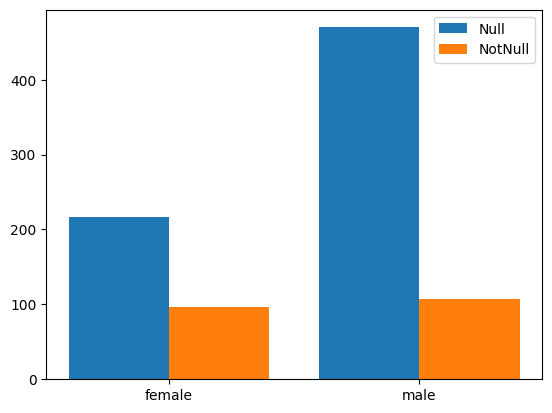

,Sex,Null,NotNull,Ratio,RatioOverall
0,female,217,97,69.108280,24.354658
1,male,470,107,81.455806,52.749719


In [18]:
missingness(df_train,"Cabin","Sex", True)

After looking missing values, I want to go deeper on the specific features.

# 1.3 - Feature-Specific Analysis:

In this section, I want to try to understand better on each feature. Also, I want to study the different methods.

**1.3.1 - Pclass and Fare**

<Axes: >

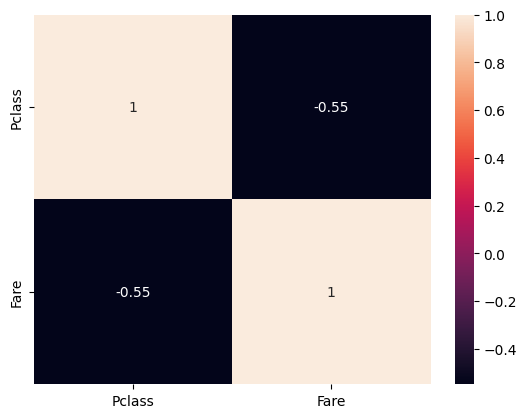

In [19]:
sns.heatmap(df_train[["Pclass", "Fare"]].corr(), annot=True)

In following lines, I was trying to create a df of Pclass based survived mean and count values to utilize in plt.bar

In [20]:
pclass_survived = df_train.groupby("Pclass").agg({"Survived": ["mean", "count"]})
pclass_survived.columns = pclass_survived.columns.droplevel(0)
pclass_survived = pclass_survived.reset_index()
pclass_survived.columns = ["Pclass", "Mean", "Count"]

<BarContainer object of 3 artists>

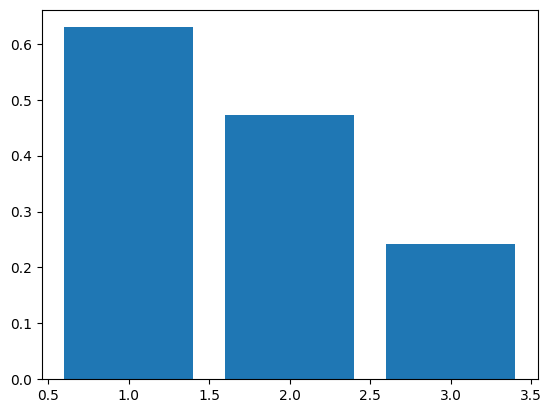

In [21]:
plt.bar(x=pclass_survived["Pclass"], height = pclass_survived["Mean"])

Then, I checked and understand seaborn barplot, and wanted to utilize the example.

<Axes: xlabel='Pclass', ylabel='Survived'>

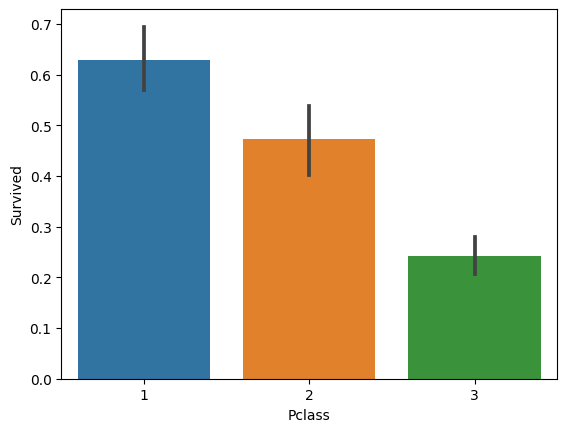

In [22]:
sns.barplot(x = "Pclass", y= "Survived", data = df_train)

<Axes: xlabel='Pclass', ylabel='Mean'>

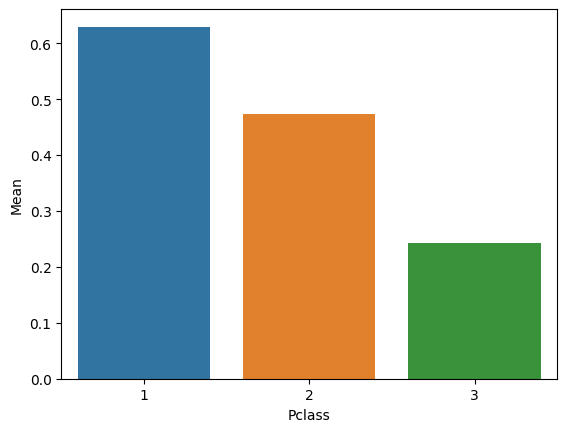

In [23]:
sns.barplot(x=pclass_survived["Pclass"], y = pclass_survived["Mean"]) 

Similary, I just want to check outliers in the Fare with Boxplot. Both sns and plt examples utilized.

<Axes: >

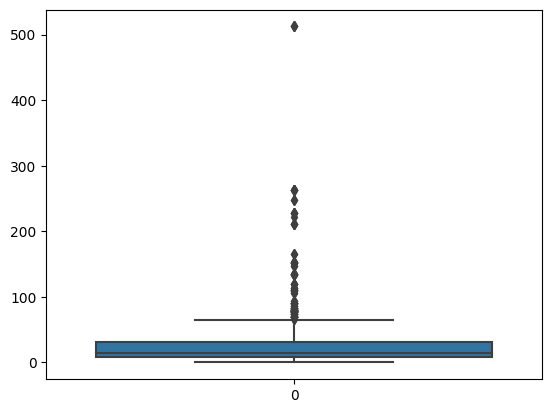

In [24]:
sns.boxplot(data = df_train["Fare"])

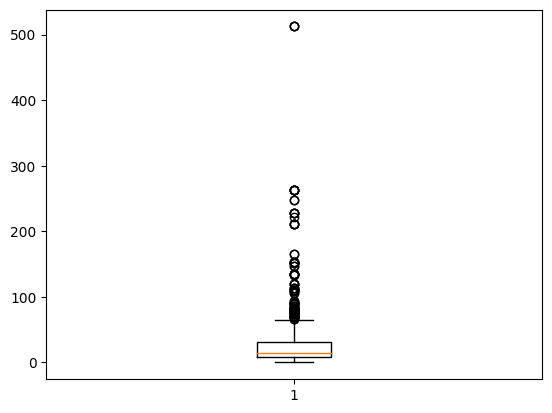

In [25]:
plt.boxplot(df_train["Fare"])
plt.show()

**1.3.2 - Name**

I just want to play around with the Titles in this section. Try different ways how I can do and finally continue with given code in the following code section.

In [26]:
df_train["Titles"] = df_train["Name"].apply(lambda x : x.split(".")[0].split(" ")[-1])

Then, I wanted to investigate impact on the Survival.

In [27]:
df_train.groupby("Titles").agg({"Survived" : ["mean", "count"]})

Survived      
              mean count
Titles                  
Capt      0.000000     1
Col       0.500000     2
Countess  1.000000     1
Don       0.000000     1
Dr        0.428571     7
Jonkheer  0.000000     1
Lady      1.000000     1
Major     0.500000     2
Master    0.575000    40
Miss      0.697802   182
Mlle      1.000000     2
Mme       1.000000     1
Mr        0.156673   517
Mrs       0.792000   125
Ms        1.000000     1
Rev       0.000000     6
Sir       1.000000     1

Since there are Titles where count is too low, I just want to work on Rare Titles. Purpose is to find rare titles and encode them with same values with functions.

In [28]:
def rare_analyser(dataframe, target, col):
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}).reset_index().sort_values(by = "RATIO", ascending = True), end="\n\n\n")

def rare_encoder_target(dataframe, rare_perc, col):
    temp_df = dataframe.copy()
    rare_columns = col
    tmp = temp_df[rare_columns].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[rare_columns] = np.where(temp_df[rare_columns].isin(rare_labels), "Rare",temp_df[rare_columns])
    return temp_df


In [29]:
rare_analyser(df_train, "Survived", "Titles")

Titles : 17
      Titles  COUNT     RATIO  TARGET_MEAN
0       Capt      1  0.001122     0.000000
14        Ms      1  0.001122     1.000000
11       Mme      1  0.001122     1.000000
6       Lady      1  0.001122     1.000000
5   Jonkheer      1  0.001122     0.000000
16       Sir      1  0.001122     1.000000
3        Don      1  0.001122     0.000000
2   Countess      1  0.001122     1.000000
7      Major      2  0.002245     0.500000
10      Mlle      2  0.002245     1.000000
1        Col      2  0.002245     0.500000
15       Rev      6  0.006734     0.000000
4         Dr      7  0.007856     0.428571
8     Master     40  0.044893     0.575000
13       Mrs    125  0.140292     0.792000
9       Miss    182  0.204265     0.697802
12        Mr    517  0.580247     0.156673




In [30]:
df_train = rare_encoder_target(df_train, 0.01,"Titles")

After utilizing rare encoder, lets check

In [31]:
df_train.groupby("Titles").agg({"Survived" : ["mean", "count"]})

Survived      
            mean count
Titles                
Master  0.575000    40
Miss    0.697802   182
Mr      0.156673   517
Mrs     0.792000   125
Rare    0.444444    27

**1.3.3 - Cabin**

In Cabin, I wonder letters in the Cabin. That's why want to get letter as a new column and observe. 

In [32]:
df_train["C_Letter"] = df_train["Cabin"].apply(lambda x: x if pd.isna(x) else str(x)[0])


In [33]:
df_train.groupby("C_Letter").agg({"Survived": ["mean", "count"]})

Survived      
              mean count
C_Letter                
A         0.466667    15
B         0.744681    47
C         0.593220    59
D         0.757576    33
E         0.750000    32
F         0.615385    13
G         0.500000     4
T         0.000000     1

In [34]:
df_train.groupby(["C_Letter", "Pclass"]).agg({"Survived": ["mean", "count"]})

Survived      
                     mean count
C_Letter Pclass                
A        1       0.466667    15
B        1       0.744681    47
C        1       0.593220    59
D        1       0.758621    29
         2       0.750000     4
E        1       0.720000    25
         2       0.750000     4
         3       1.000000     3
F        2       0.875000     8
         3       0.200000     5
G        3       0.500000     4
T        1       0.000000     1

**1.3.4 - Embarked**

General looking for Embarked on Survived and Fare

In [35]:
df_train.groupby("Embarked").agg({"Survived": ["mean", "count"]})

Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.336957   644

In [36]:
df_train.groupby("Embarked").agg({"Fare": ["mean", "count"]})

Fare      
               mean count
Embarked                 
C         59.954144   168
Q         13.276030    77
S         27.079812   644

In [37]:
df_train.groupby(["Embarked", "Pclass"]).agg({"Fare": ["mean", "count", lambda x: x.count() / len(df_train["Pclass"])]})

Fare                 
                       mean count <lambda_0>
Embarked Pclass                             
C        1       104.718529    85   0.095398
         2        25.358335    17   0.019080
         3        11.214083    66   0.074074
Q        1        90.000000     2   0.002245
         2        12.350000     3   0.003367
         3        11.183393    72   0.080808
S        1        70.364862   127   0.142536
         2        20.327439   164   0.184063
         3        14.644083   353   0.396184

# 1.4. - Distribution and Relationsips
We investigated features one by one. Now, I wanted to investigate any information we can get from distributions or any relationship available. 

Before we continue, I want to divide the columns according to their category. There is defined function I utilize called grab_col_names. Lets define it first.

In [38]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [39]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df_train,6)

**1.4.1 - Numerical Features**

Histograms and Kernel density graphs were investigated for numerical columns, except PassangerId. As an example only Age and Fare were shown.

In [40]:
num_cols

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

<Axes: xlabel='Age', ylabel='Density'>

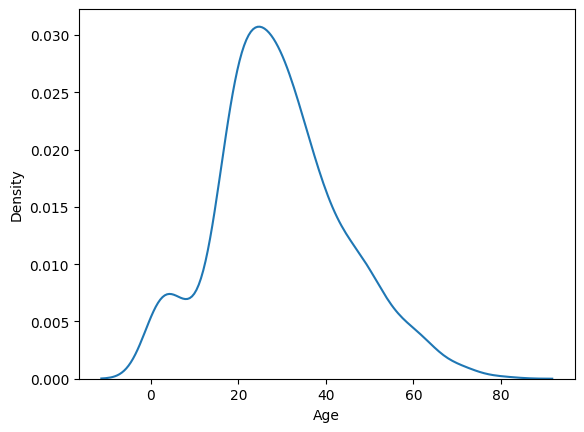

In [41]:
sns.kdeplot(data = df_train, x="Age")

<Axes: xlabel='Fare', ylabel='Count'>

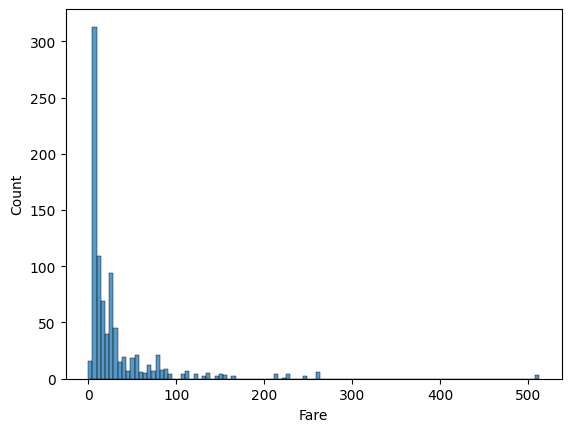

In [42]:
sns.histplot(data = df_train, x = "Fare")

As can be seen above graph Fare has right-skewed distribution. Lets check log distribution also. 

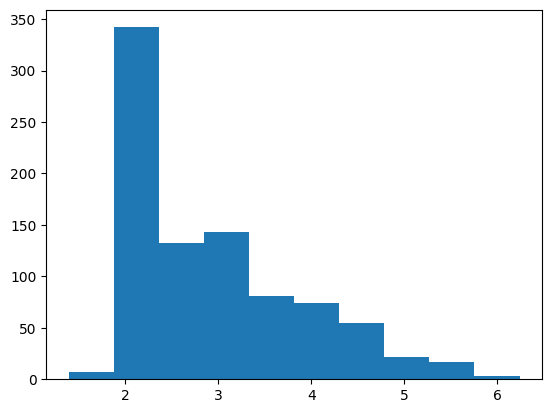

In [43]:
plt.hist(np.log(df_train[df_train["Fare"]>0]["Fare"]))
plt.show()

**1.4.2 - Categorical Features**

Only countplot investigation were done for certain columns.

<Axes: xlabel='Sex', ylabel='count'>

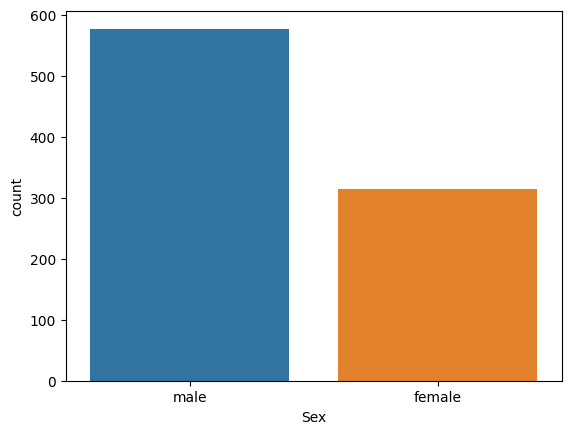

In [44]:
sns.countplot(data=df_train, x="Sex")

<Axes: xlabel='Pclass', ylabel='count'>

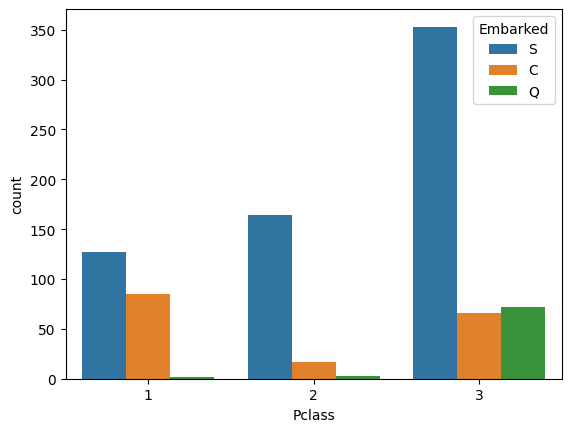

In [45]:
sns.countplot(data=df_train, x="Pclass", hue= "Embarked")

**1.4.3 - Survival Analysis**

Both understanding on Survive distribution through the columns and graph types some extra investigations were also done. 

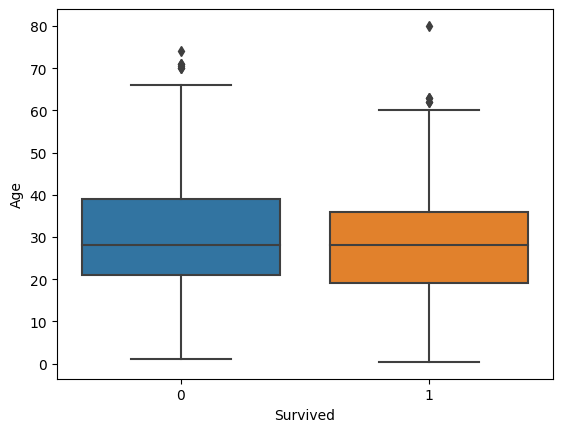

In [46]:
sns.boxplot(data= df_train, x = "Survived", y="Age")
plt.show()

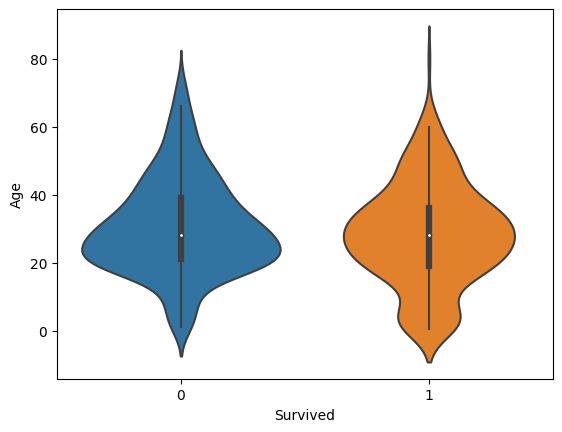

In [47]:
sns.violinplot(x = "Survived", y = "Age", data = df_train)
plt.show()

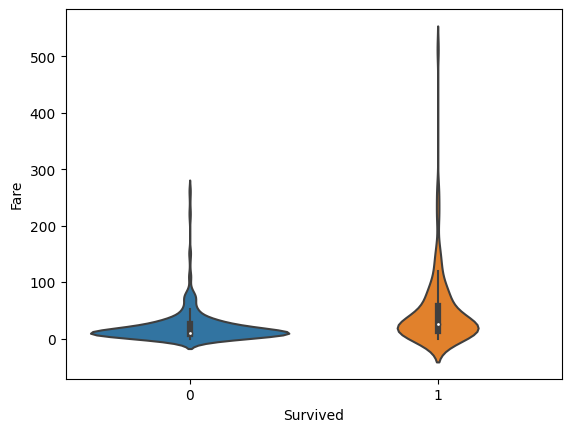

In [48]:
sns.violinplot(x = "Survived", y = "Fare", data = df_train)
plt.show()

# 1.5 - Feature Interaction (Only for EDA Purpose)
In this sections feature interactions will only purpose for EDA. Applying both Train and Test will be done in further stages.

**1.5.1 - Pclass and Sex**

As titles implies for observing combination of Pclass and Sex.

In [49]:
df_train["New_PClass_Sex_str"] = df_train["Pclass"].apply(str) + df_train["Sex"]

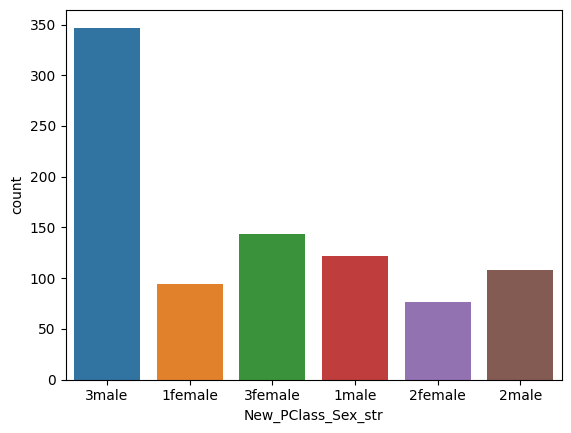

In [50]:
sns.countplot(df_train, x = "New_PClass_Sex_str")
plt.show()

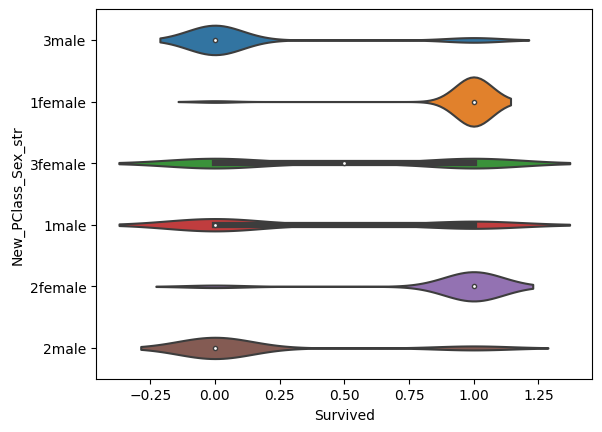

In [51]:
sns.violinplot(x = "Survived", y = "New_PClass_Sex_str", data = df_train)
plt.show()

**1.5.2 - Family Size**

In [52]:
df_train ["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1

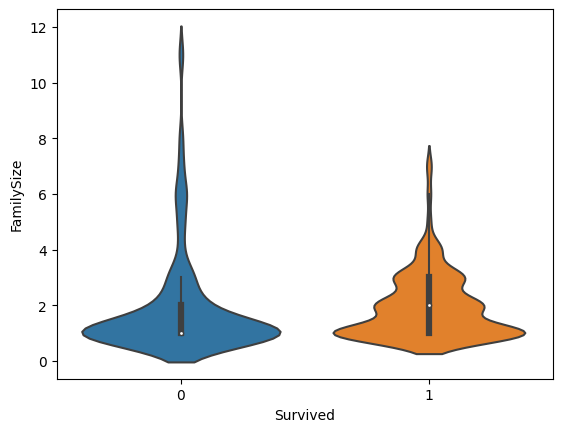

In [53]:
sns.violinplot(x = "Survived", y = "FamilySize", data = df_train)
plt.show()

**1.5.3 - Alone or Not and Per Person Cost**

In [54]:
df_train["Alone_or_Not"] = df_train["FamilySize"].apply(lambda x: "Alone" if x == 1 else "Not") 
df_train["PerPersonCost"] = df_train["Fare"] / df_train["FamilySize"]

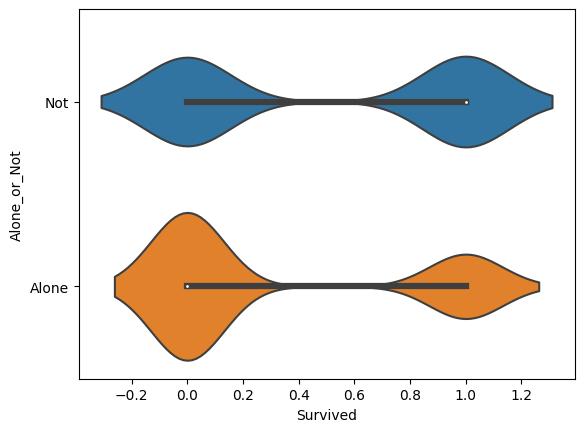

In [55]:
sns.violinplot(x = "Survived", y = "Alone_or_Not", data = df_train)
plt.show()

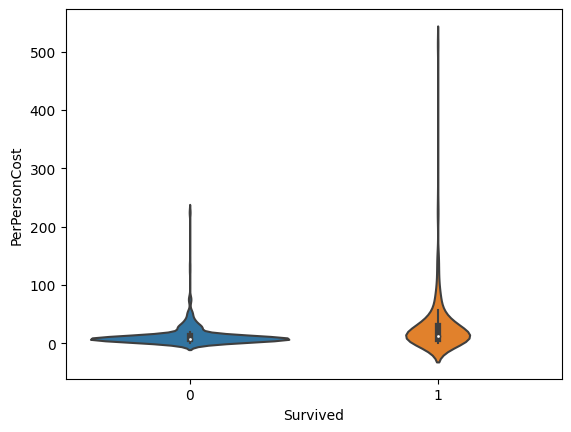

In [56]:
sns.violinplot(x = "Survived", y = "PerPersonCost", data = df_train)
plt.show()

# 1.6 - Correlation Analysis
After new features added, re-assing the columns according to their categories.

In [57]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df_train,6)

Since PassengerId is unique for each passenger, we can drop it as it doesn't add useful information.

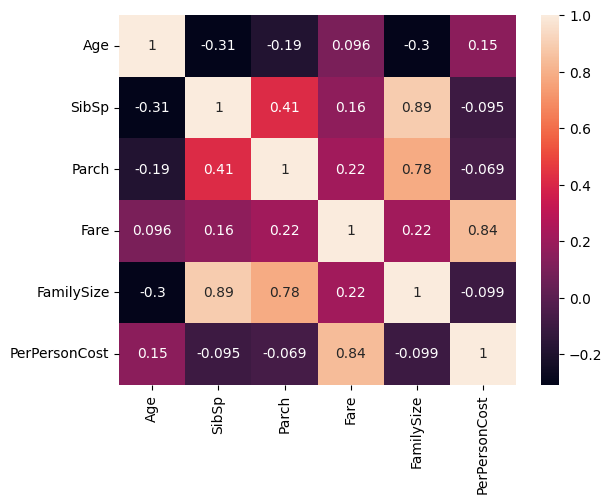

In [58]:
num_cols.remove("PassengerId")
num_corr = df_train[num_cols].corr()
sns.heatmap(num_corr, annot=True)
plt.show()

# 1.7 - Final Visulizations
Just to work on some extra visulization techniques and try to investigate results

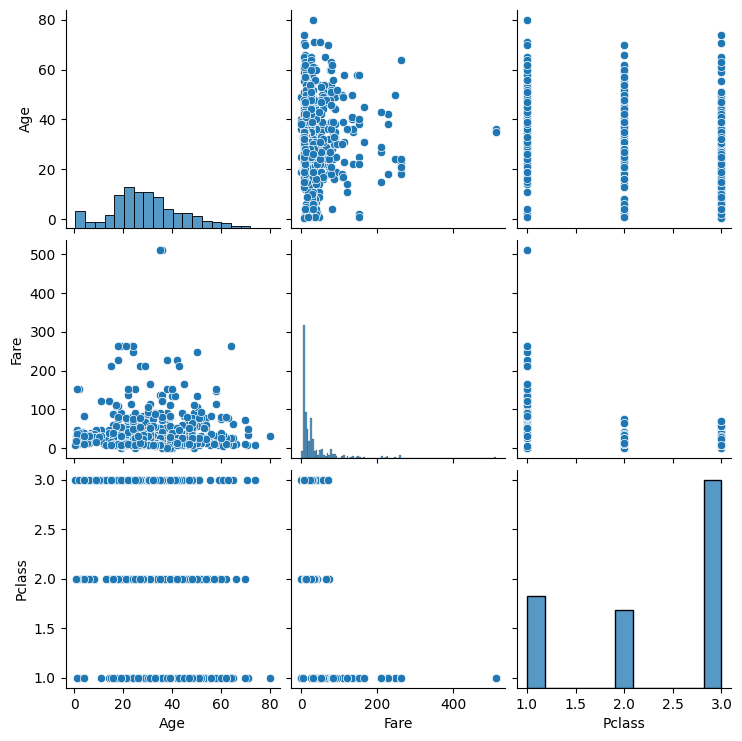

In [59]:
#PairPlot:

sns.pairplot(data = df_train[["Age", "Fare", "Pclass"]])
plt.show()

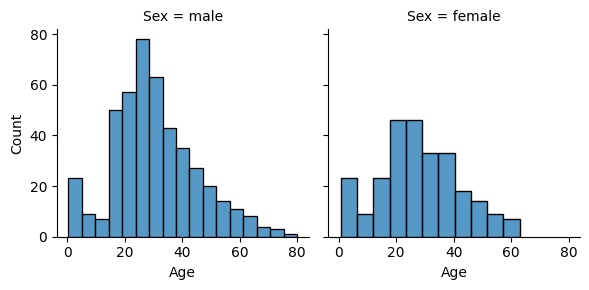

In [60]:
#FacetGrid:

g = sns.FacetGrid(data = df_train,col= "Sex")
g.map(sns.histplot, "Age")
plt.show()

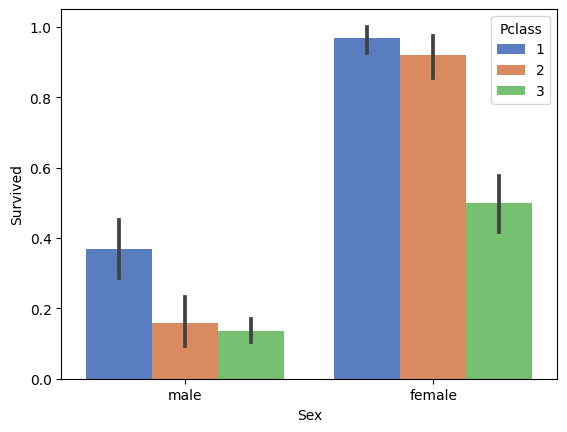

In [61]:
sns.barplot(x="Sex", y="Survived", estimator="mean", data = df_train, palette="muted", hue= "Pclass")
plt.show()

# 1.8 - Final Notes and Outcomes from EDA Section
You can find my final notes for the EDA section and decided ideas for the following sections like how to handle missing values, outliers, future engineering and so on.

1. Embarked missing values will be deleted.
2. Age missing values will be looked over for finding a correlation or relationship. It may be show good combining SibSp, Sex, Pclass etc. If any thing can not found, mean directly utilized for it.
3. Cabin missing values will be utilize only for determine full or empty.
4. Ticket will be investigate for only number of contain any letters as new feature.
5. Per Person Cost will be created from Fare.
6. Titles will be created from Name.
7. Age will be categorized.
8. FamilySize and IsAlone will be added.
9. Adding new combinations like Pclass and Sex. Followings are planning:
    - Embarked + Sex
    - Embarked + Pclass
    - Titles + Sex
    - Embarked + Titles
    - IsAlone + Sex
    - Titles + Pclass
    - Pclass + Age Category

# 2- Feature Engineering and Modeling  

Welcome the Feature Engineering and Modeling section. In this section, I did a different py file while I work in PyCharm. I split the codes and wanted to continue like that. That's why, all libraries and data imported again. 

Please let me know better and effective ways. Thanks!

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [63]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

Planned tasks can be found in the following for this section:

1. Baseline Modeling: To understand how result change and try out different models
2. Feature Engineering: Going to contains tasks mentioned above and more
3. Model Iterations: Determining general model, hyperparameter optimization and evaluating.
4. Prepare for Submission: Final step and preparing for submission

# 2.1- Baseline Modeling
Logistic Regression and Decision Tree Model selected and worked on in this section. 

Since we are in the beginning stage, I did not worked on any missing values or other issues, and just droped to column and tried to see the result.

**2.1.1- Logistic Regression**

In [64]:

df_train_raw_log = df_train.copy()
df_train_raw_log["Sex_for_raw_Drop"] = df_train_raw_log["Sex"].apply(lambda x: 0 if x == "male" else 1)
df_train_raw_log.dropna(inplace = True)

y_raw_log = df_train_raw_log["Survived"]

text_cols = []
for col in df_train_raw_log.columns:
    if df_train_raw_log[col].dtype == "object":
        text_cols.append(col)

X_raw_log = df_train_raw_log.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', "PassengerId", "Survived"], axis =1)

raw_logistic = LogisticRegression().fit(X_raw_log,y_raw_log)

raw_loggistic_results = cross_validate(raw_logistic, X_raw_log, y_raw_log, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])


raw_loggistic_results_df = pd.DataFrame({"test_accuracy" : raw_loggistic_results['test_accuracy'].mean(),
                                         'test_f1' :raw_loggistic_results['test_f1'].mean(),
                                         'test_roc_auc': raw_loggistic_results['test_roc_auc'].mean(),
                                         'test_precision': raw_loggistic_results['test_precision'].mean(),
                                         'test_recall': raw_loggistic_results['test_recall'].mean()}, index = [0])
print(raw_loggistic_results_df)

print("----------------------------------------------------------------------")
y_pred_raw_log = raw_logistic.predict(X_raw_log)
print(classification_report(y_raw_log, y_pred_raw_log))

   test_accuracy  test_f1  test_roc_auc  test_precision  test_recall
0       0.753604  0.81436      0.835167        0.811116     0.828333
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        60
           1       0.82      0.84      0.83       123

    accuracy                           0.77       183
   macro avg       0.73      0.73      0.73       183
weighted avg       0.76      0.77      0.76       183



**2.1.2- Decision Tree Model**

In [65]:
df_train_raw_cart = df_train.copy()

df_train_raw_cart.dropna(inplace = True)
y_raw_cart = df_train_raw_cart["Survived"]
X_raw_cart = df_train_raw_cart.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', "PassengerId", "Survived"], axis =1)
# X_raw_cart_trials = df_train_raw_cart.drop( ["PassengerId", "Survived", "Name","Sex", "Ticket", "Cabin","Embarked"], axis =1)
# DecisionTreeClassifier().fit(X_raw_cart_trials, y_raw_cart) Purpose was to investigate strings on CART. Categoric ones not worked detailed much.

raw_cart = DecisionTreeClassifier().fit(X_raw_cart, y_raw_cart)
raw_cart_results = cross_validate(raw_cart,X_raw_cart, y_raw_cart,cv=5,scoring=["accuracy", "f1", "roc_auc", "precision", "recall"] )

raw_cart_results_df = pd.DataFrame({"test_accuracy" : raw_cart_results['test_accuracy'].mean(),
                                         'test_f1' :raw_cart_results['test_f1'].mean(),
                                         'test_roc_auc': raw_cart_results['test_roc_auc'].mean(),
                                         'test_precision': raw_cart_results['test_precision'].mean(),
                                         'test_recall': raw_cart_results['test_recall'].mean()}, index = [0])
print(raw_cart_results_df)

print("----------------------------------------------------------------------")
y_pred_raw_cart = raw_cart.predict(X_raw_cart)
print(classification_report(y_raw_cart, y_pred_raw_cart))

   test_accuracy   test_f1  test_roc_auc  test_precision  test_recall
0       0.628829  0.726701      0.570167        0.715874     0.740333
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       123

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



We saw all 1 result. In this section my comment is this since its a tree type model and we did not split train data set, model is memorize the results, overfitting. Its expected.

# 2.2- Feature Engineering
Lets start with handling missing values.

**2.2.1- Missing Values**
Lets firstly investigate which Columns have missing values both for Train and Test.

In [66]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Define a function call missing_values_table and missing_vs_target to help us investigate missing values according to our target variable which is Survival.

In [68]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [69]:
missing_train = missing_values_table(df_train,True)
print("----------------------------------------------------------------------")
missing_test = missing_values_table(df_test,True)
print("----------------------------------------------------------------------")
missing_vs_target(df_train,"Survived",missing_train)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
----------------------------------------------------------------------
       n_miss  ratio
Cabin     327  78.23
Age        86  20.57
Fare        1   0.24
----------------------------------------------------------------------
             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




As a summary:
- Train Data -> Missings: Age, Cabin, Embarked 
- Test Data -> Missings: Age, Cabin, Fare

**2.2.1.1-Age**

Lets handle both train and test datasets Age columns missing values

**Train - Age**

In [70]:
df_train ["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1 

family_list = list(df_train ["FamilySize"].unique())
family_list.remove(11)


for col in family_list:
    df_train.loc[(df_train["Age"].isnull()) & (df_train["Sex"] == "female") & (df_train["FamilySize"] == col), "Age"] = df_train.groupby(["Sex","FamilySize"])["Age"].mean()["female"][col]

for col in family_list:
    df_train.loc[(df_train["Age"].isnull()) & (df_train["Sex"] == "male") & (df_train["FamilySize"] == col), "Age"] = df_train.groupby(["Sex","FamilySize"])["Age"].mean()["male"][col]

df_train = df_train.dropna(subset="Age")

df_train = df_train.drop("FamilySize", axis= 1)

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

Summary: For Categorization, temporary family size created, according to Sex and Family size mean values assigned.

However, at FamilySize = 11. There was one family, unfortunately all members past away. Cabin values were also missing. It dropped.


**Test - Age**

In [71]:
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1 #Temporary - CHANGES IN DATAFRAME

test_family = list(df_test["FamilySize"].unique())
test_family.remove(11)

for col in test_family:
    df_test.loc[(df_test["Age"].isnull()) & (df_test["Sex"] == "female") & (df_test["FamilySize"] == col), "Age"] = df_test.groupby(["Sex","FamilySize"])["Age"].mean()["female"][col]

for col in test_family:
    df_test.loc[(df_test["Age"].isnull()) & (df_test["Sex"] == "male") & (df_test["FamilySize"] == col), "Age"] = df_test.groupby(["Sex","FamilySize"])["Age"].mean()["male"][col]

df_test.loc[(df_test["Age"].isnull()) & (df_test["Sex"] == "male"), "Age"] = df_test.groupby("Sex")["Age"].mean()["male"]
df_test.loc[(df_test["Age"].isnull()) & (df_test["Sex"] == "female"), "Age"] = df_test.groupby("Sex")["Age"].mean()["female"]

df_test = df_test.drop("FamilySize", axis= 1)

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Summary: Similar method follow from the Train - Age solution. Since this is a Test data, no column dropped. It fill with just Sex's mean.

**2.2.1.2-Cabin**

Lets handle both train and test datasets Cabin columns missing values

**Train - Cabin**

In [72]:
df_train["Cabin"] = df_train["Cabin"].apply(lambda x: str(x)[-3] if pd.notna(x) and " " in str(x) and str(x)[0] == "F" else ("Unknown" if pd.isna(x) else str(x)[0])) # PERMANENT CHANGE IN DATAFRAME
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Summary: NaN's fill with "Unknown". Filled ones updated with only First Letter, if multiple exists, first letter associated with number is selected.

**Test - Cabin**

In [73]:
df_test["Cabin"] = df_test["Cabin"].apply(lambda x: str(x)[-3] if pd.notna(x) and " " in str(x) and str(x)[0] == "F" else ("Unknown" if pd.isna(x) else str(x)[0])) # PERMANENT CHANGE IN DATAFRAME
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

Summary: Same assumption with Train - Cabin

**2.2.1.2- Train - Embarked**

Summary: 2 missing, they are dropped.

In [74]:
df_train = df_train.dropna(subset="Embarked")
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**2.2.1.3- Test - Fare**

Missing values are going to fill with mean or median. Decision will be given based on Test Fare distribution.

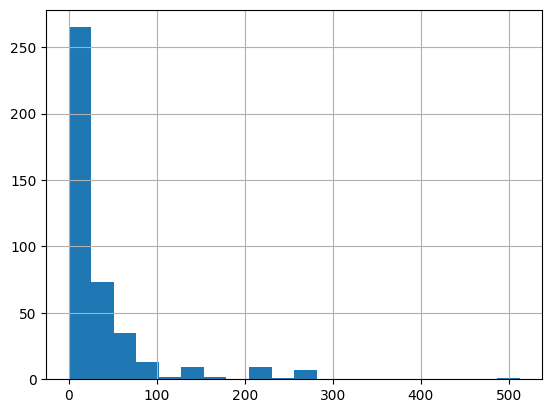

In [75]:
df_test['Fare'].hist(bins=20)
plt.show()

To check Fare is normally distributed. It seems like not, we can continue with select to median. Also to make it more specific, we will look groupby with Pclass. 

In [76]:
df_test.groupby("Pclass")["Fare"].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [77]:
df_test.loc[df_test["Fare"].isnull(), "Fare"] = df_test.groupby("Pclass")["Fare"].median()[3]

**Final Check**

In [78]:
print(df_train.isnull().sum())
print("----------------------------------------------------------------------")
df_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
----------------------------------------------------------------------


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

2.2.2- Checking Outliers:
I wanted to check any extreme outliers in our raw data. Reassess will be done after feature creation is done. I do not want disturb data too much. That's why, I wanted to check 99 - 1 percentiles. Already created scripts will be utilized.

In [81]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df_train,6)
num_cols.remove("PassengerId")

In [90]:

def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.01, q3=0.99):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(col,"\n",dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(col,"\n",dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

def single_outlier_summary(dataframe, col):
    if check_outlier(dataframe,col):
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        print(col,"Max: ", dataframe[col].max(), "Min: ", dataframe[col].min(), "Mean: ", dataframe[col].mean(),"low_limit= ", low_limit, "up_limit= ", up_limit,"# of Outlier", dataframe[((dataframe[col] < low_limit) | (dataframe[col] > up_limit))].shape[0] )
        print("######################################################################################################################")
        grab_outliers(dataframe,col)
        print(
            "######################################################################################################################")
    else:
        print(col," :No Outlier found!")

In [84]:
for col in num_cols:
    single_outlier_summary(df_train, col)

Age  :No Outlier found!
SibSp  :No Outlier found!
Parch  :No Outlier found!
Fare  :No Outlier found!


In [85]:
cat_cols_test, num_cols_test, cat_but_car_test, num_but_cat_test= grab_col_names(df_test,6)
num_cols_test.remove("PassengerId")

for col in num_cols_test:
    single_outlier_summary(df_test, col)

Age  :No Outlier found!
SibSp  :No Outlier found!
Parch  :No Outlier found!
Fare  :No Outlier found!


In given percentiles (99 - 1), no outliers found. I will continue with the Feature Creation process

**2.2.3- Feature Creation**

Section will be related feature creation from raw data we have. Summary will provided.

In [88]:
  #Ticket:
        #The ticket will be examined to see if any meaningful information can be generated.

        #Is Contains Letter?
df_train["New_Ticket_ContainLetter"] = df_train['Ticket'].apply(lambda x: any(char.isalpha() for char in str(x)))
df_test["New_Ticket_ContainLetter"] = df_test['Ticket'].apply(lambda x: any(char.isalpha() for char in str(x)))

        #Ticket Length:
df_train["New_Ticket_TicketLength"] = df_train["Ticket"].apply(lambda x: len(str(x)))
df_test["New_Ticket_TicketLength"] = df_test["Ticket"].apply(lambda x: len(str(x)))

        #Ticket Group Size:
df_train["New_Ticket_GroupSize"] = df_train.groupby("Ticket")["Name"].transform("count")
df_test["New_Ticket_GroupSize"] = df_test.groupby("Ticket")["Name"].transform("count")


        #Is ticket shared?
df_train["New_Ticket_IsShared"] = df_train["New_Ticket_GroupSize"] > 1
df_test["New_Ticket_IsShared"] = df_test["New_Ticket_GroupSize"] > 1

    #Sibsp and Parch:

        #FamilySize:
df_train["New_FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["New_FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

        #Categories:

df_train["New_FamilyCategory"] = pd.cut(df_train["New_FamilySize"],bins = [0,1,3,15], labels=["Alone", "Small", "Large"])
df_test["New_FamilyCategory"] = pd.cut(df_test["New_FamilySize"],bins = [0,1,3,15], labels=["Alone", "Small", "Large"])

    #Fare:

        #PerPersonFare:
df_train["New_PerPersonFare"] = df_train["Fare"]/df_train["New_FamilySize"]
df_test["New_PerPersonFare"] = df_test["Fare"]/df_test["New_FamilySize"]

        #Categories:

df_train["New_PPFareCategory"] = pd.cut(df_train["New_PerPersonFare"], bins = [0,20,60,600], labels = ["Small", "Medium", "Expensive"])
df_test["New_PPFareCategory"] = pd.cut(df_test["New_PerPersonFare"], bins = [0,20,60,600], labels = ["Small", "Medium", "Expensive"])

        #Fare per Cabin:

df_train["New_FareperCabin"] = df_train.groupby("Cabin")["Fare"].transform("mean")
df_test["New_FareperCabin"] = df_test.groupby("Cabin")["Fare"].transform("mean")

        #Fare per Embarked:

df_train["New_FareperEmbarked"] = df_train.groupby("Embarked")["Fare"].transform("mean")
df_test["New_FareperEmbarked"] = df_test.groupby("Embarked")["Fare"].transform("mean")

        #Relative Fare to Pclass:

df_train["New_Relative_FaretoPclass"] = df_train["Fare"] / df_train.groupby("Pclass")["Fare"].transform("mean")
df_test["New_Relative_FaretoPclass"] = df_test["Fare"] / df_test.groupby("Pclass")["Fare"].transform("mean")

    #Name:

        #Title Extraction:


df_train["New_Titles"] = df_train["Name"].apply(lambda x : x.split(".")[0].split(" ")[-1])
df_test["New_Titles"] = df_test["Name"].apply(lambda x : x.split(".")[0].split(" ")[-1])

        #Surname:
df_train["New_Surname"] = df_train["Name"].apply(lambda x: x.split(",")[0])
df_test["New_Surname"] = df_test["Name"].apply(lambda x: x.split(",")[0])

        #Name Length:
df_train["New_NameLength"] = df_train["Name"].apply(lambda x: len(x))
df_test["New_NameLength"] = df_test["Name"].apply(lambda x: len(x))

    #Age:

df_train["New_Age_Category"] = pd.cut(df_train["Age"],bins=[0,2,8,17,30,60,90], labels =["Baby", "Child", "Teenage", "Young", "Adult", "Senior"])
df_test["New_Age_Category"] = pd.cut(df_test["Age"],bins=[0,2,8,17,30,60,90], labels =["Baby", "Child", "Teenage", "Young", "Adult", "Senior"])

    #Combinations:

        # - Pclass + Sex

df_train["New_Pclass_Sex"] = df_train["Pclass"].apply(str) + "_" + df_train["Sex"]
df_test["New_Pclass_Sex"] = df_test["Pclass"].apply(str) + "_" + df_test["Sex"]

        # - Pclass  + New_Age_Category

df_train["New_Pclass_New_Age_Category"] = df_train["Pclass"].apply(str) + "_" + df_train["New_Age_Category"].astype(str)
df_test["New_Pclass_New_Age_Category"] = df_test["Pclass"].apply(str) + "_" + df_test["New_Age_Category"].astype(str)

        # - Embarked + Sex

df_train["New_Embarked_Sex"] = df_train["Embarked"]+ "_" + df_train["Sex"]
df_test["New_Embarked_Sex"] = df_test["Embarked"] + "_" + df_test["Sex"]

        # - Embarked + Pclass

df_train["New_Embarked_Pclass"] = df_train["Embarked"]+ "_" + df_train["Pclass"].apply(str)
df_test["New_Embarked_Pclass"] = df_test["Embarked"] + "_" + df_test["Pclass"].apply(str)

        # - Embarked + New_Titles

df_train["New_Embarked_New_Titles"] = df_train["Embarked"]+ "_" + df_train["New_Titles"]
df_test["New_Embarked_New_Titles"] = df_test["Embarked"] + "_" + df_test["New_Titles"]

        # - New_Titles + Sex

df_train["New_New_Titles_Sex"] = df_train["New_Titles"]+ "_" + df_train["Sex"]
df_test["New_New_Titles_Sex"] = df_test["New_Titles"] + "_" + df_test["Sex"]

        # - New_Titles + Pclass

df_train["New_New_Titles_Sex"] = df_train["New_Titles"]+ "_" + df_train["Pclass"].apply(str)
df_test["New_New_Titles_Sex"] = df_test["New_Titles"] + "_" + df_test["Pclass"].apply(str)

        # - New_FamilyCategory + Sex

df_train["New_New_FamilyCategory_Sex"] = df_train["New_FamilyCategory"].astype(str)+ "_" + df_train["Sex"]
df_test["New_New_FamilyCategory_Sex"] = df_test["New_FamilyCategory"].astype(str) + "_" + df_test["Sex"]

        # - New_PPFareCategory + New_FamilyCategory

df_train["New_New_PPFareCategory_Sex"] = df_train["New_PPFareCategory"].astype(str)+ "_" + df_train["Sex"]
df_test["New_New_PPFareCategory_Sex"] = df_test["New_PPFareCategory"].astype(str) + "_" + df_test["Sex"]


Please find summary of the created features:
1. Ticket-Based Features
- New_Ticket_ContainLetter: Checks if the ticket contains any letters (binary feature).
- New_Ticket_TicketLength: Measures the length of the ticket string.
- New_Ticket_GroupSize: Counts the number of passengers sharing the same ticket.
- New_Ticket_IsShared: Identifies if the ticket is shared (GroupSize > 1).
2. Family-Based Features (SibSp & Parch)
- New_FamilySize: Total family size (SibSp + Parch + 1, including the passenger).
- New_FamilyCategory: Categorizes family size:
    - Alone: 1 person
    - Small: 2-3 people
    - Large: 4+ people
3. Fare-Based Features
- New_PerPersonFare: Fare per individual (Fare / FamilySize).
- New_PPFareCategory: Categorizes PerPersonFare into:
    - Small: 0-20
    - Medium: 20-60
    - Expensive: 60+
- New_FareperCabin: Average fare for passengers in the same cabin.
- New_FareperEmbarked: Average fare for passengers from the same embarkation port.
- New_Relative_FaretoPclass: Normalizes Fare based on the mean fare of the same Pclass.
4. Name-Based Features
- New_Titles: Extracts title (Mr., Mrs., Miss, etc.) from the name.
- New_Surname: Extracts surname from the name.
- New_NameLength: Measures the length of the name.
5. Age-Based Features
- New_Age_Category: Categorizes Age into:
    - Baby: 0-2
    - Child: 3-8
    - Teenage: 9-17
    - Young: 18-30
    - Adult: 31-60
- Senior: 61+
6. Combination Features
- New_Pclass_Sex: Combines Passenger Class (Pclass) and Sex.
- New_Pclass_New_Age_Category: Combines Passenger Class (Pclass) and Age Category.
- New_Embarked_Sex: Combines Embarked location and Sex.
- New_Embarked_Pclass: Combines Embarked location and Passenger Class.
- New_Embarked_New_Titles: Combines Embarked location and Titles.
- New_New_Titles_Sex: Combines Titles and Sex.
- New_New_Titles_Pclass: Combines Titles and Pclass.
- New_New_FamilyCategory_Sex: Combines Family Category and Sex.
- New_New_PPFareCategory_Sex: Combines PerPersonFare Category and Sex.

Final check for outliers:

In [91]:
        #Train Check
            #We found in "New_PerPersonFare" but nothing done.
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df_train,6)
num_cols.remove("PassengerId")
num_cols.remove("New_Age_Category")

for col in num_cols:
    single_outlier_summary(df_train[num_cols], col)


Age  :No Outlier found!
SibSp  :No Outlier found!
Parch  :No Outlier found!
Fare  :No Outlier found!
New_Ticket_TicketLength  :No Outlier found!
New_Ticket_GroupSize  :No Outlier found!
New_FamilySize  :No Outlier found!
New_PerPersonFare Max:  512.3292 Min:  0.0 Mean:  19.8880171585142 low_limit=  -227.87006249999985 up_limit=  379.78343749999976 # of Outlier 2
######################################################################################################################
New_PerPersonFare 
       Age  SibSp  Parch      Fare  New_Ticket_TicketLength  New_Ticket_GroupSize  New_FamilySize  New_PerPersonFare  New_FareperCabin  New_Relative_FaretoPclass  New_NameLength
258  35.0      0      0  512.3292                        8                     3               1           512.3292         18.638577                   6.085138              16
737  35.0      0      0  512.3292                        8                     3               1           512.3292        114.994909         

In [92]:
cat_cols_test, num_cols_test, cat_but_car_test, num_but_cat_test= grab_col_names(df_test,6)
num_cols_test.remove("PassengerId")
num_cols_test.remove("New_Age_Category")

for col in num_cols_test:
    single_outlier_summary(df_test[num_cols_test], col)

Age  :No Outlier found!
SibSp  :No Outlier found!
Parch  :No Outlier found!
Fare  :No Outlier found!
New_Ticket_TicketLength  :No Outlier found!
New_FamilySize  :No Outlier found!
New_PerPersonFare  :No Outlier found!
New_FareperCabin  :No Outlier found!
New_Relative_FaretoPclass  :No Outlier found!
New_NameLength  :No Outlier found!


Correlation check is also done, but any action was not taken.

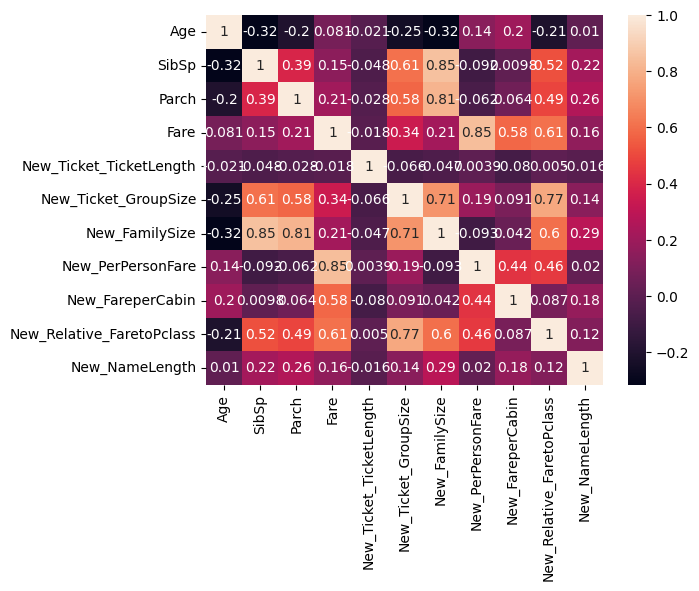

In [95]:
sns.heatmap(df_train[num_cols].corr(), annot = True)
plt.show()

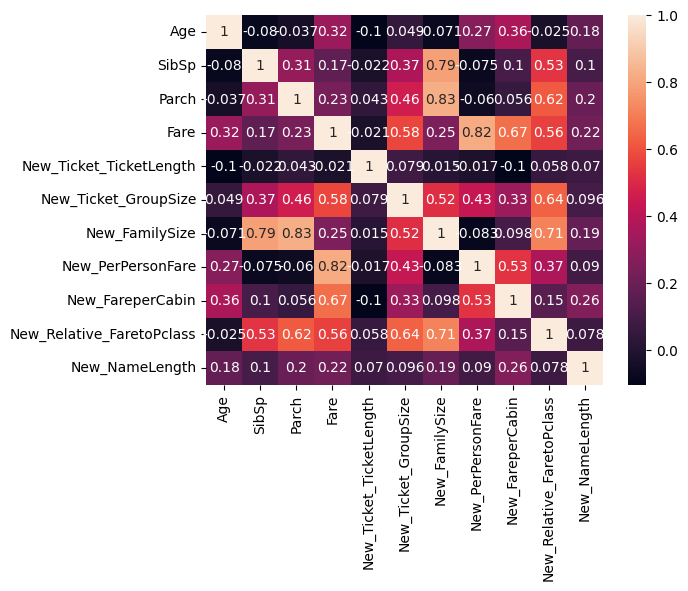

In [96]:
sns.heatmap(df_test[num_cols].corr(), annot = True)
plt.show()

# 2.3- Encoding

Two type of encoding was utilized. First one is One-Hot encoding and other one is Frequency encdoing. Frequency encoding is used to handle high-cardinality categorical features.

We are combining since we want to same amount of features in both train and test data set.

In [101]:
    #Combining Two Datasets:
df_combine = pd.concat([df_train,df_test], axis = 0)
df_combine.isnull().sum()

    #Preparing Columns

for col in list(df_combine.columns[df_combine.dtypes=="category"]): df_combine[col] = df_combine[col].astype("object")

cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df_combine,6)

cat_cols_train_onehot = [col for col in cat_cols if col not in num_but_cat]
cat_cols_train_frequency = cat_but_car

len(df_combine.columns[df_combine.dtypes=="object"])
list(df_combine.columns[df_combine.dtypes=="category"])

    #One-Hot and Frequency Encoding
df_combine = pd.get_dummies(df_combine, columns =cat_cols_train_onehot, drop_first=True)

for col in cat_cols_train_frequency: train_freq = df_combine[col].value_counts() / len(df_combine)
    df_combine[col + "_freq"] = df_combine[col].map(train_freq)

df_combine.drop(columns=cat_cols_train_frequency, inplace=True)

df_combine.dtypes.value_counts()

    #Splitting Datasets:
df_train = df_combine[~df_combine["Survived"].isnull()]
df_test = df_combine[df_combine["Survived"].isnull()]

df_test.drop("Survived", axis = 1, inplace = True)

# 2.4- General Modeling:

In this section, I tried following model types to understand better Logistic Regression, Decision Tree Model, Random Forest. 

**2.4.1- Logistic Regression:**

   test_accuracy  test_f1  test_roc_auc  test_precision  test_recall
0       0.825424  0.75745      0.876226        0.812755     0.711765
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       542
         1.0       0.84      0.73      0.78       340

    accuracy                           0.84       882
   macro avg       0.84      0.82      0.83       882
weighted avg       0.84      0.84      0.84       882

----------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

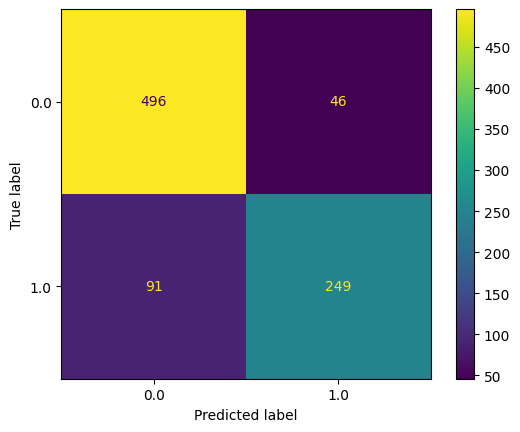

In [108]:
y_log = df_train["Survived"]
X_log = df_train.drop(["Survived", "PassengerId"], axis = 1)

logistic = LogisticRegression().fit(X_log, y_log)

y_pred_log = logistic.predict(X_log)

    # Evaluations
logistic_result = cross_validate(logistic, X_log, y_log, cv = 5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
logistic_results_df = pd.DataFrame({"test_accuracy" : logistic_result['test_accuracy'].mean(),
                                         'test_f1' :logistic_result['test_f1'].mean(),
                                         'test_roc_auc': logistic_result['test_roc_auc'].mean(),
                                         'test_precision': logistic_result['test_precision'].mean(),
                                         'test_recall': logistic_result['test_recall'].mean()}, index = [0])

print(logistic_results_df)
print("----------------------------------------------------------------------")
print(classification_report(y_log, y_pred_log))
print("----------------------------------------------------------------------")

conf_matrix_log = confusion_matrix(y_log, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log, display_labels=logistic.classes_)
plt.figure(0)
disp_log.plot()



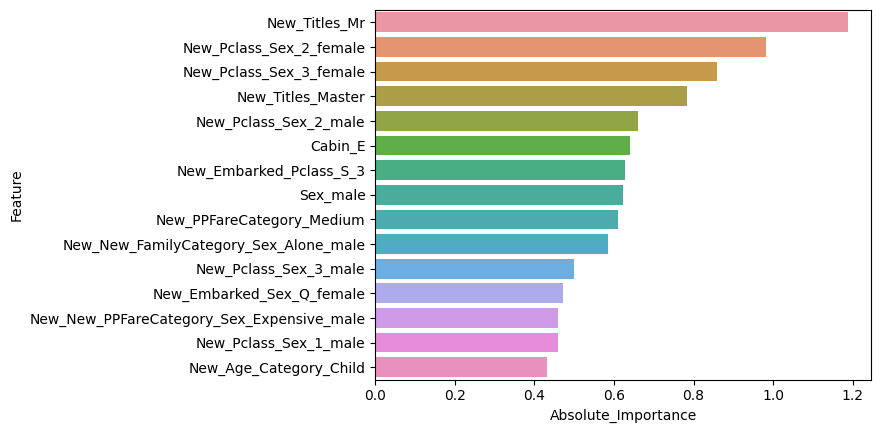

In [109]:
    #Feature Importance:

feature_importance_log = pd.DataFrame({"Feature": X_log.columns, "Importance": logistic.coef_[0]})
feature_importance_log["Absolute_Importance"] = np.abs(feature_importance_log["Importance"])
feature_importance_log = feature_importance_log.sort_values(by = "Absolute_Importance", ascending=False)

sns.barplot(feature_importance_log[0:15], x = "Absolute_Importance", y="Feature")
plt.figure(1)
plt.show()

**2.4.2- Decision Tree Model**

   test_accuracy   test_f1  test_roc_auc  test_precision  test_recall
0       0.759637  0.683135       0.74354        0.696251     0.676471
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       542
         1.0       1.00      0.99      1.00       340

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

----------------------------------------------------------------------


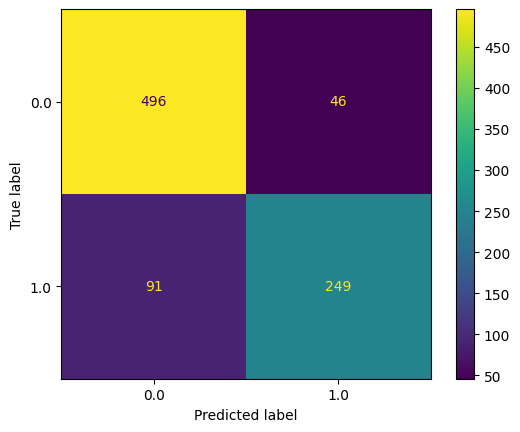

In [111]:

y_cart = df_train["Survived"]
X_cart = df_train.drop(["Survived", "PassengerId"], axis = 1)
cart = DecisionTreeClassifier().fit(X_cart, y_cart)

y_pred_cart = cart.predict(X_cart)

    #Evalutaions

cart_result = cross_validate(cart, X_cart, y_cart, cv = 5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
cart_results_df = pd.DataFrame({"test_accuracy" : cart_result['test_accuracy'].mean(),
                                         'test_f1' :cart_result['test_f1'].mean(),
                                         'test_roc_auc': cart_result['test_roc_auc'].mean(),
                                         'test_precision': cart_result['test_precision'].mean(),
                                         'test_recall': cart_result['test_recall'].mean()}, index = [0])

print(cart_results_df)
print("----------------------------------------------------------------------")
print(classification_report(y_cart, y_pred_cart))
print("----------------------------------------------------------------------")

conf_matrix_cart = confusion_matrix(y_cart, y_pred_cart)
disp_cart = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log, display_labels=cart.classes_)
disp_cart.plot()
plt.show()

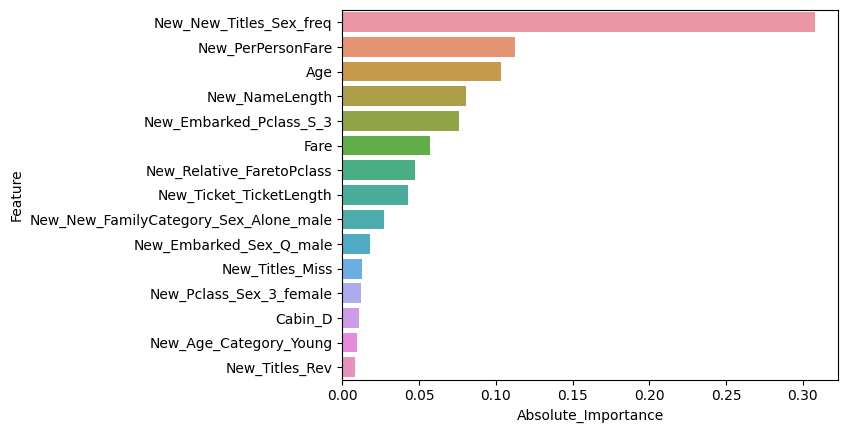

In [113]:
    #Feature Importance:

feature_importance_cart = pd.DataFrame({"Feature": X_cart.columns, "Importance": cart.feature_importances_})
feature_importance_cart["Absolute_Importance"] = np.abs(feature_importance_cart["Importance"])
feature_importance_cart = feature_importance_cart.sort_values(by = "Absolute_Importance", ascending=False)

sns.barplot(feature_importance_cart[0:15], x = "Absolute_Importance", y="Feature")
plt.show()


**2.4.3- Random Forest**

   test_accuracy   test_f1  test_roc_auc  test_precision  test_recall
0       0.819768  0.754783      0.877142        0.791011     0.723529
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       542
         1.0       1.00      1.00      1.00       340

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

----------------------------------------------------------------------


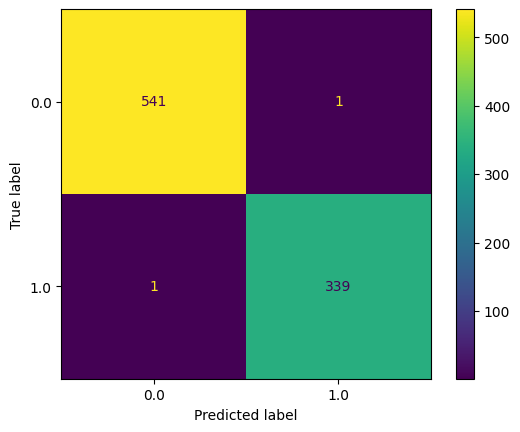

In [115]:

y_rf = df_train["Survived"]
X_rf = df_train.drop(["Survived", "PassengerId"], axis = 1)

rf_model = RandomForestClassifier().fit(X_rf, y_rf)

y_pred_rf = rf_model.predict(X_rf)

    #Evalutaions
rf_result = cross_validate(rf_model, X_rf, y_rf, cv = 5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
rf_result_df = pd.DataFrame({"test_accuracy" : rf_result['test_accuracy'].mean(),
                                         'test_f1' :rf_result['test_f1'].mean(),
                                         'test_roc_auc': rf_result['test_roc_auc'].mean(),
                                         'test_precision': rf_result['test_precision'].mean(),
                                         'test_recall': rf_result['test_recall'].mean()}, index = [0])

print(rf_result_df)
print("----------------------------------------------------------------------")
print(classification_report(y_rf, y_pred_rf))
print("----------------------------------------------------------------------")

conf_matrix_rf = confusion_matrix(y_rf, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()


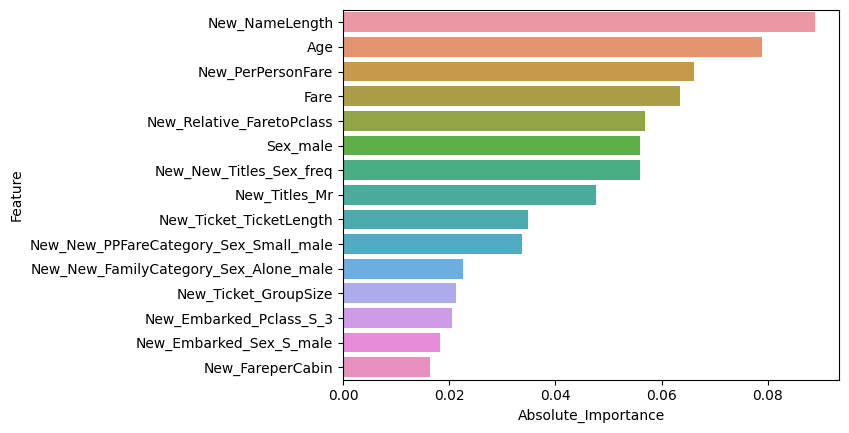

In [116]:
    #Feature Importance:

feature_importance_rf = pd.DataFrame({"Feature": X_rf.columns, "Importance": rf_model.feature_importances_})
feature_importance_rf["Absolute_Importance"] = np.abs(feature_importance_rf["Importance"])
feature_importance_rf = feature_importance_rf.sort_values(by = "Absolute_Importance", ascending=False)

sns.barplot(feature_importance_rf[0:15], x = "Absolute_Importance", y="Feature")
plt.show()

After investigation and getting more used to for the structure. I continued for selecting Final model.

# 2.5- Final Model:

For selecting final model, I utilized a created function, basically it quickly reviews some desired model types and compares the score based on roc_auc. 

In [122]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                 #  ('KNN', KNeighborsClassifier()),
                #   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                #   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier(verbosity=-1)),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [126]:
y_rf = df_train["Survived"]
X_rf = df_train.drop(["Survived", "PassengerId"], axis = 1)

base_models(X_rf, y_rf, scoring="roc_auc")

Base Models....
roc_auc: 0.868 (LR) 
roc_auc: 0.7436 (CART) 
roc_auc: 0.8649 (RF) 
roc_auc: 0.8848 (GBM) 
roc_auc: 0.8654 (XGBoost) 
roc_auc: 0.8709 (LightGBM) 


**LightGBM** selected after the results.

Note: I did not see the results correctly and think LightGBM is the highest. That's why its selected. Sorry about that. I will revisit this in future versions to ensure the best model selection.

Firstly, lets train the model and quickly look the results.

In [127]:
    #Training:

y_model = df_train["Survived"]
X_model = df_train.drop(["Survived", "PassengerId"], axis = 1)

lgbm_model = LGBMClassifier().fit(X_model, y_model)

y_pred_model = lgbm_model.predict(X_model)

        #Evalutaions
lgbm_result = cross_validate(lgbm_model, X_model, y_model, cv = 5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

lgbm_result_df = pd.DataFrame({"test_accuracy" : lgbm_result['test_accuracy'].mean(),
                                         'test_f1' :lgbm_result['test_f1'].mean(),
                                         'test_roc_auc': lgbm_result['test_roc_auc'].mean(),
                                         'test_precision': lgbm_result['test_precision'].mean(),
                                         'test_recall': lgbm_result['test_recall'].mean()}, index = [0])

print(lgbm_result_df)
print("----------------------------------------------------------------------")
print(classification_report(y_model, y_pred_model))
print("----------------------------------------------------------------------")

   test_accuracy   test_f1  test_roc_auc  test_precision  test_recall
0       0.826567  0.764391      0.874315         0.80203     0.732353
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       542
         1.0       0.99      1.00      1.00       340

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

----------------------------------------------------------------------


Then, we can continue with the Parameter Optimization. 

In [128]:
lgbm_model.get_params()

lgbm_params = { 'learning_rate': [0.01, 0.05, 0.1],
                'num_leaves': [20, 31, 40],
                'max_depth': [-1, 10, 20],
                'min_data_in_leaf': [10, 20, 30],
                'feature_fraction': [0.6, 0.8, 1.0],
                }

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs= -1, verbose=True).fit(X_model,y_model)

lgbm_best_grid.best_params_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'feature_fraction': 0.6,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_data_in_leaf': 30,
 'num_leaves': 31}

Lets configure final model

In [132]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_).fit(X_model, y_model)

For the last section feature importance, lets utilize a function 

In [133]:
def plot_importance(model, features, num, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

   test_accuracy   test_f1  test_roc_auc  test_precision  test_recall
0       0.841314  0.785649      0.878771        0.818742     0.755882
----------------------------------------------------------------------


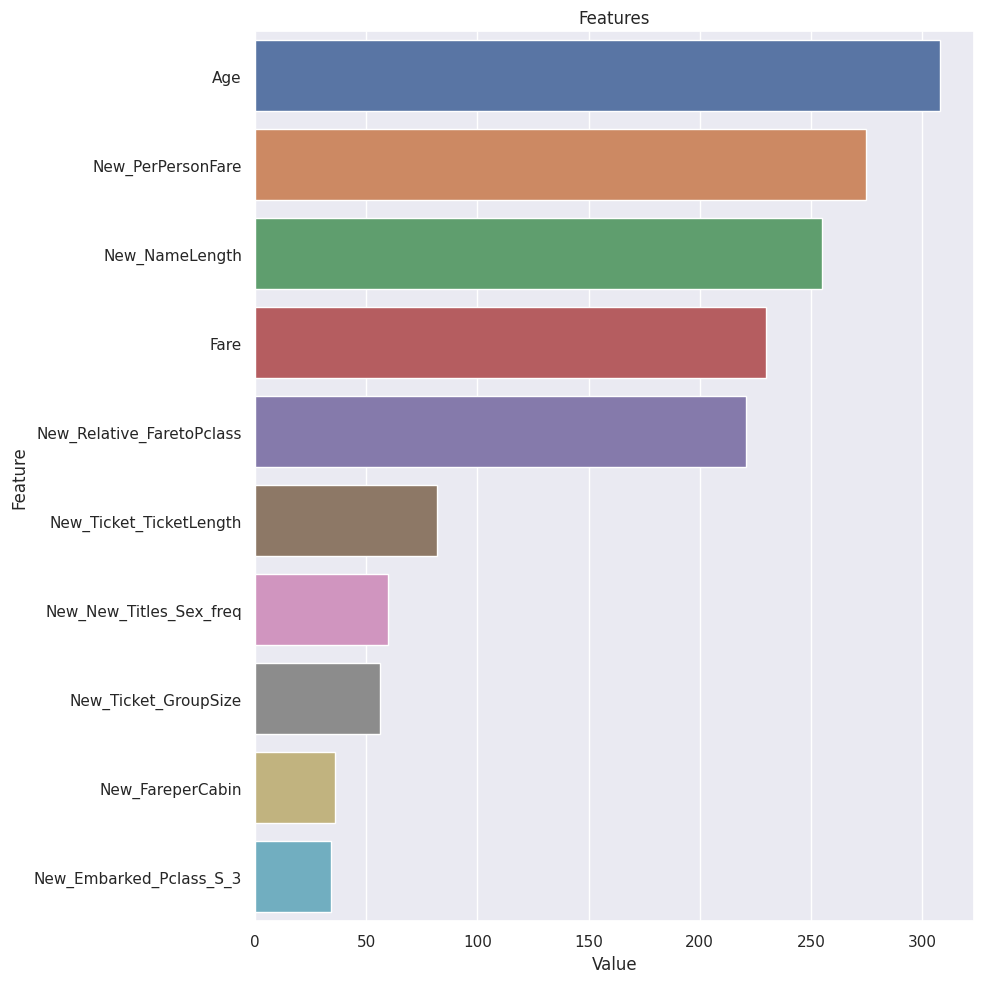

In [134]:
lgbm_final_result = cross_validate(lgbm_final, X_model, y_model, cv = 5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

lgbm_final_result_df = pd.DataFrame({"test_accuracy" : lgbm_final_result['test_accuracy'].mean(),
                                         'test_f1' :lgbm_final_result['test_f1'].mean(),
                                         'test_roc_auc': lgbm_final_result['test_roc_auc'].mean(),
                                         'test_precision': lgbm_final_result['test_precision'].mean(),
                                         'test_recall': lgbm_final_result['test_recall'].mean()}, index = [0])

print(lgbm_final_result_df)
print("----------------------------------------------------------------------")
    #Feature Importance:
plot_importance(lgbm_final,X_model,10)


Final model is ready. Lets predict the result with df_test and create submission.csv

In [137]:

df_test_final = df_test.drop("PassengerId", axis =1)

y_pred_test_final = lgbm_final.predict(df_test_final)

titanic_submission = pd.DataFrame({"PassengerId": df_test["PassengerId"],
                                   "Survived": y_pred_test_final})

titanic_submission["Survived"] = titanic_submission["Survived"].astype(int)

titanic_submission.to_csv("submission.csv", index=False)

# Thank you 

Thank you for taking the time to review my work!

This project was an amazing learning experience, and I truly appreciate any feedback, suggestions, or discussions that can help me improve. From EDA to feature engineering, model selection, and hyperparameter tuning, I’ve learned a lot, but I also know that there’s always room to improve.